In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay
from imblearn.metrics import geometric_mean_score
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Training.csv')
test_data = pd.read_csv('/content/drive/MyDrive/TestData.csv')

In [ ]:
train_data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
79994,Male,47.0,0,0,not current,27.32,3.5,126,0
79995,Male,29.0,0,0,not current,44.66,8.8,280,1
79996,Male,12.0,0,0,No Info,17.62,4.5,140,0
79997,Male,26.0,0,0,not current,26.20,6.1,300,1


In [ ]:
train_data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [ ]:
test_data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level'],
      dtype='object')

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79999 entries, 0 to 79998
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               79999 non-null  object 
 1   age                  79999 non-null  float64
 2   hypertension         79999 non-null  int64  
 3   heart_disease        79999 non-null  int64  
 4   smoking_history      79999 non-null  object 
 5   bmi                  79999 non-null  float64
 6   HbA1c_level          79999 non-null  float64
 7   blood_glucose_level  79999 non-null  int64  
 8   diabetes             79999 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 5.5+ MB


In [ ]:
train_data["smoking_history"] = train_data["smoking_history"].notnull().astype("int")
test_data["smoking_history"] = test_data["smoking_history"].notnull().astype("int")

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train_data['gender']= label_encoder.fit_transform(train_data['gender'])
test_data['gender']= label_encoder.fit_transform(test_data['gender'])
train_data['smoking_history']= label_encoder.fit_transform(train_data['smoking_history'])
test_data['smoking_history']= label_encoder.fit_transform(test_data['smoking_history'])

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               20001 non-null  int64  
 1   age                  20001 non-null  float64
 2   hypertension         20001 non-null  int64  
 3   heart_disease        20001 non-null  int64  
 4   smoking_history      20001 non-null  int64  
 5   bmi                  20001 non-null  float64
 6   HbA1c_level          20001 non-null  float64
 7   blood_glucose_level  20001 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 1.2 MB


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79999 entries, 0 to 79998
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               79999 non-null  int64  
 1   age                  79999 non-null  float64
 2   hypertension         79999 non-null  int64  
 3   heart_disease        79999 non-null  int64  
 4   smoking_history      79999 non-null  int64  
 5   bmi                  79999 non-null  float64
 6   HbA1c_level          79999 non-null  float64
 7   blood_glucose_level  79999 non-null  int64  
 8   diabetes             79999 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 5.5 MB


In [ ]:
train_data.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,79999.000000,79999.000000,79999.000000,79999.000000,79999.0,79999.000000,79999.000000,79999.000000,79999.000000
mean,0.415543,41.880246,0.074126,0.039000,0.0,27.331050,5.526505,138.023938,0.085301
std,0.493275,22.506830,0.261977,0.193597,0.0,6.638606,1.071882,40.786723,0.279331
min,0.000000,0.080000,0.000000,0.000000,0.0,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.000000,0.000000,0.0,23.650000,4.800000,100.000000,0.000000
50%,0.000000,43.000000,0.000000,0.000000,0.0,27.320000,5.800000,140.000000,0.000000
75%,1.000000,60.000000,0.000000,0.000000,0.0,29.560000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.000000,1.000000,0.0,95.220000,9.000000,300.000000,1.000000


In [ ]:
test_data.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
count,20001.000000,20001.000000,20001.000000,20001.000000,20001.0,20001.000000,20001.000000,20001.000000
mean,0.411129,41.908297,0.077746,0.041098,0.0,27.279640,5.531513,138.194540
std,0.492051,22.557383,0.267778,0.198522,0.0,6.629496,1.065835,40.393003
min,0.000000,0.080000,0.000000,0.000000,0.0,10.080000,3.500000,80.000000
25%,0.000000,24.000000,0.000000,0.000000,0.0,23.530000,4.800000,100.000000
50%,0.000000,43.000000,0.000000,0.000000,0.0,27.320000,5.800000,140.000000
75%,1.000000,60.000000,0.000000,0.000000,0.0,29.650000,6.200000,159.000000
max,1.000000,80.000000,1.000000,1.000000,0.0,95.690000,9.000000,300.000000


In [ ]:
train_data.corr()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.031359,0.015171,0.074678,NaN,-0.022506,0.020946,0.018409,0.036501
age,-0.031359,1.000000,0.249443,0.232685,NaN,0.335897,0.102008,0.109218,0.256620
hypertension,0.015171,0.249443,1.000000,0.115526,NaN,0.148676,0.085382,0.083394,0.197154
heart_disease,0.074678,0.232685,0.115526,1.000000,NaN,0.061500,0.068744,0.071489,0.173334
smoking_history,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,-0.022506,0.335897,0.148676,0.061500,NaN,1.000000,0.086631,0.092338,0.215905
HbA1c_level,0.020946,0.102008,0.085382,0.068744,NaN,0.086631,1.000000,0.167232,0.403117
blood_glucose_level,0.018409,0.109218,0.083394,0.071489,NaN,0.092338,0.167232,1.000000,0.418685
diabetes,0.036501,0.256620,0.197154,0.173334,NaN,0.215905,0.403117,0.418685,1.000000


In [ ]:
test_data.corr()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
gender,1.000000,-0.027832,0.010509,0.089602,NaN,-0.025011,0.016004,0.012333
age,-0.027832,1.000000,0.257961,0.236007,NaN,0.343402,0.098727,0.116537
hypertension,0.010509,0.257961,1.000000,0.143052,NaN,0.143838,0.063435,0.088512
heart_disease,0.089602,0.236007,0.143052,1.000000,NaN,0.060103,0.063045,0.064461
smoking_history,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,-0.025011,0.343402,0.143838,0.060103,NaN,1.000000,0.068391,0.086939
HbA1c_level,0.016004,0.098727,0.063435,0.063045,NaN,0.068391,1.000000,0.164696
blood_glucose_level,0.012333,0.116537,0.088512,0.064461,NaN,0.086939,0.164696,1.000000


<Axes: title={'center': 'Has Diabetes(1) vs Does Has Diabetes(0)'}, xlabel='Output class', ylabel='Count'>

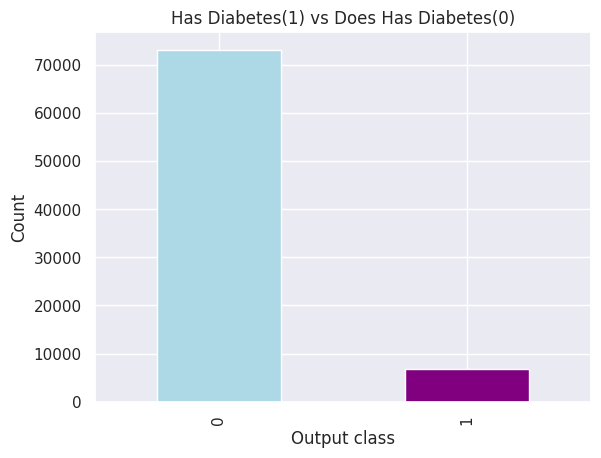

In [ ]:
train_data.diabetes.value_counts().plot.bar(color=['lightblue', 'purple'],title="Has Diabetes(1) vs Does Has Diabetes(0)", xlabel="Output class", ylabel = "Count")

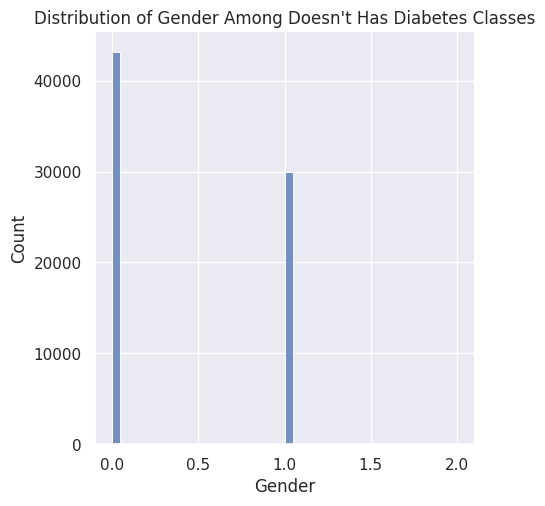

In [ ]:
#0 = Female
#1 = Male
temp = train_data.query('diabetes == 0')
sns.set_theme()
sns.displot(data=temp.gender).set(title="Distribution of Gender Among Doesn't Has Diabetes Classes", xlabel="Gender")

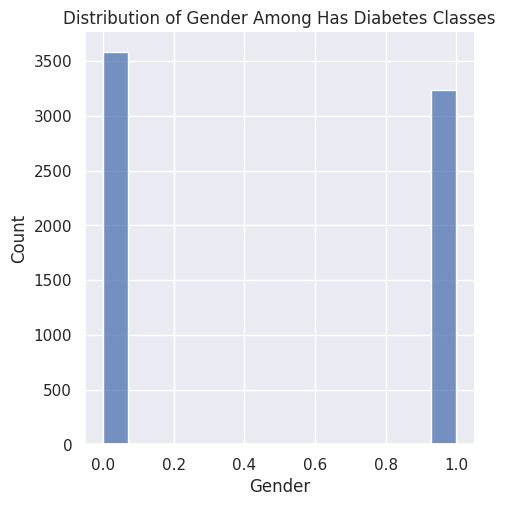

In [ ]:
temp = train_data.query('diabetes == 1')
sns.set_theme()
sns.displot(data=temp.gender).set(title="Distribution of Gender Among Has Diabetes Classes", xlabel="Gender")

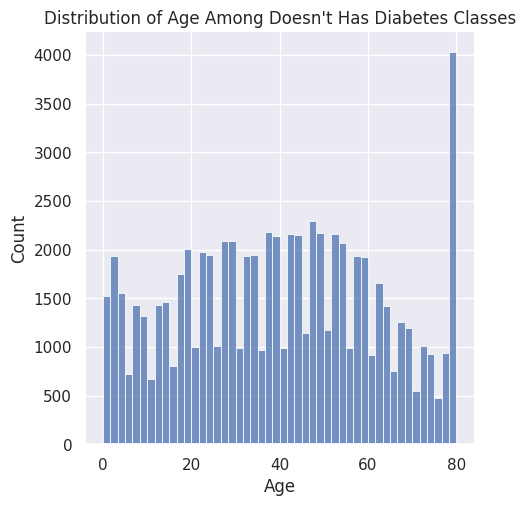

In [ ]:
temp = train_data.query('diabetes == 0')
sns.set_theme()
sns.displot(data=temp.age).set(title="Distribution of Age Among Doesn't Has Diabetes Classes", xlabel="Age")

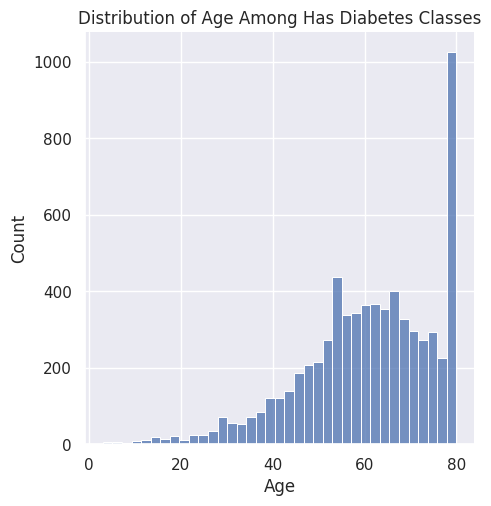

In [ ]:
temp = train_data.query('diabetes == 1')
sns.set_theme()
sns.displot(data=temp.age).set(title="Distribution of Age Among Has Diabetes Classes", xlabel="Age")

In [ ]:
print(len(train_data.query('diabetes == 0 and gender == 0')))  #0 = Female
print(len(train_data.query('diabetes == 0 and gender == 1')))  #1 = Male
print(len(train_data.query('diabetes == 1 and gender == 0')))
print(len(train_data.query('diabetes == 1 and gender == 1')))

43188
29969
3586
3238


In [ ]:
X_train = train_data.iloc[:, 1:8].values
y_train = train_data.iloc[:, 8].values

result_data = pd.read_csv('/content/drive/MyDrive/Result.csv')

X_test = test_data.iloc[:, 1:].values
y_test = result_data.iloc[:, 1].values

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(79999, 7)
(79999,)
(20001, 7)
(20001,)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score:  0.96005199740013
F1 score:  0.7236250432376341
Precision score:  0.8609053497942387
Recall score:  0.6241050119331742


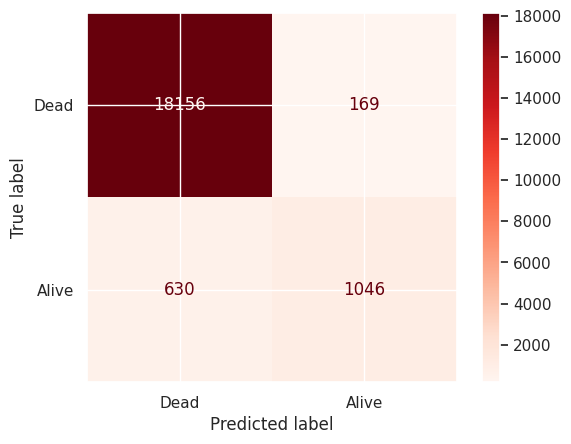

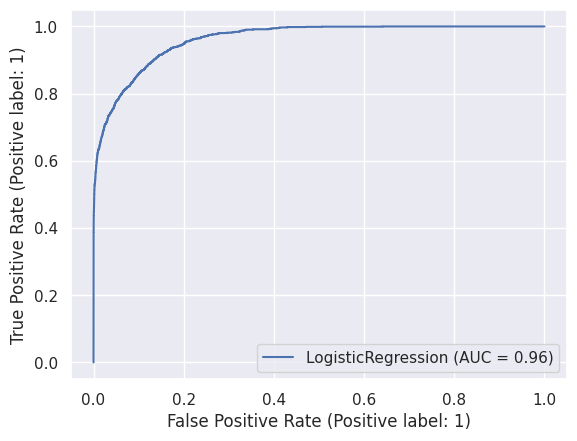

In [ ]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
Y_pred = clf.predict(X_test)
clf.predict_proba(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Dead','Alive'])
cmd.plot(cmap=plt.cm.Reds)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy score:  0.9328533573321334
F1 score:  0.3564925730713943
Precision score:  0.9051094890510949
Recall score:  0.22195704057279236


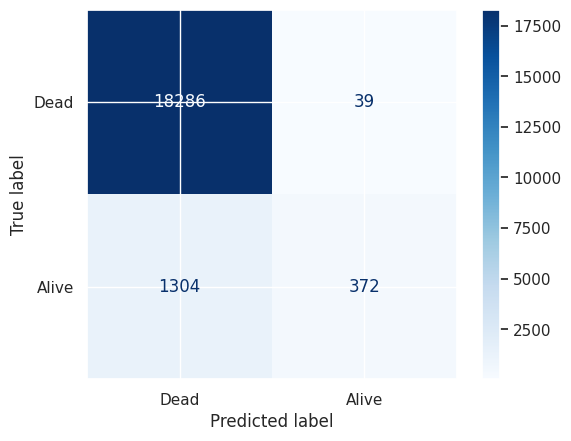

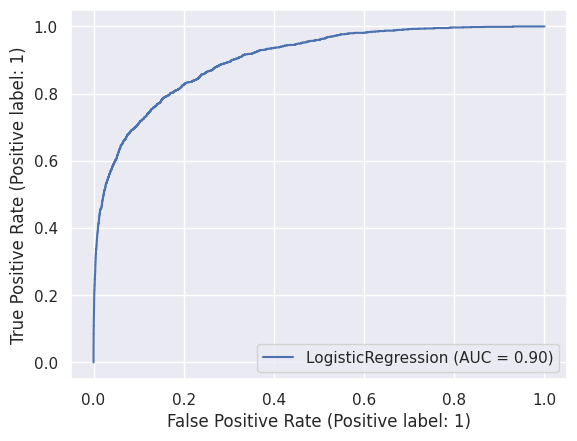

In [ ]:
#using hyper parameter
clf = LogisticRegression(solver='saga', multi_class='multinomial').fit(X_train, y_train)
Y_pred = clf.predict(X_test)
clf.predict_proba(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Dead','Alive'])
cmd.plot(cmap=plt.cm.Blues)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)

Accuracy score:  0.9639018049097545
F1 score:  0.7309985096870342
Precision score:  0.9732142857142857
Recall score:  0.5853221957040573


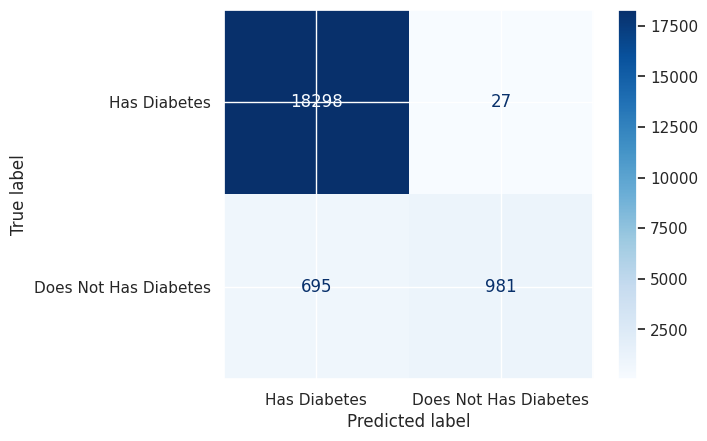

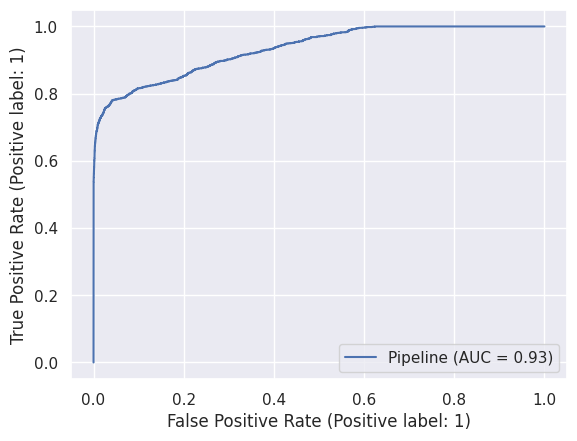

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
Y_pred= clf.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Has Diabetes','Does Not Has Diabetes'])
cmd.plot(cmap=plt.cm.Blues)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)

Accuracy score:  0.9019549022548873
F1 score:  0.5266714940864108
Precision score:  0.44223753546817995
Recall score:  0.6509546539379475


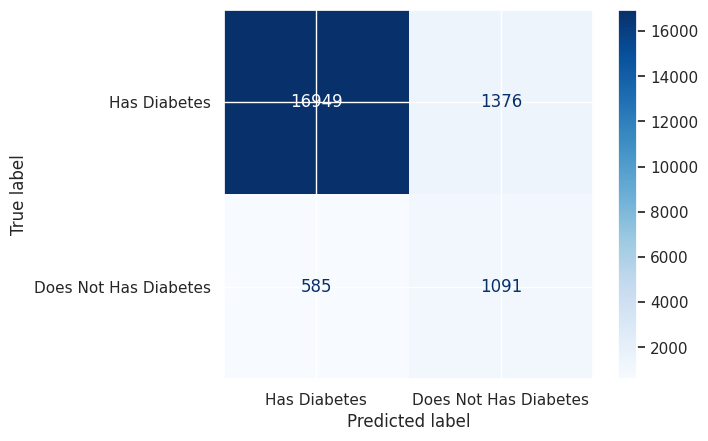

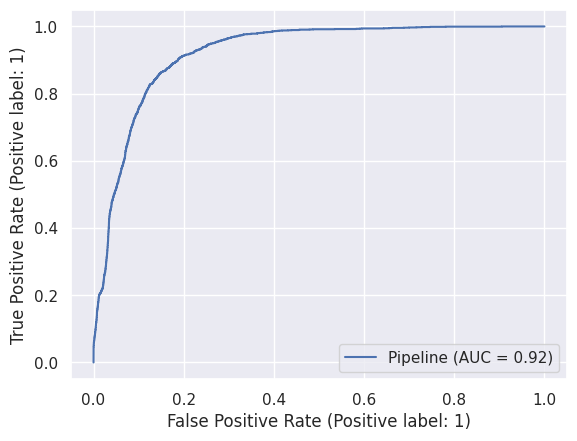

In [ ]:
#using hyper parameter
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(), GaussianNB(priors=None))
clf.fit(X_train, y_train)
Y_pred= clf.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Has Diabetes','Does Not Has Diabetes'])
cmd.plot(cmap=plt.cm.Blues)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)

Accuracy score:  0.9019549022548873
F1 score:  0.5266714940864108
Precision score:  0.44223753546817995
Recall score:  0.6509546539379475


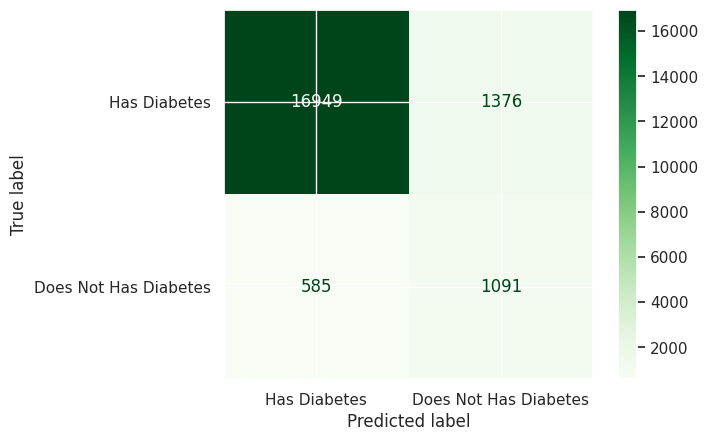

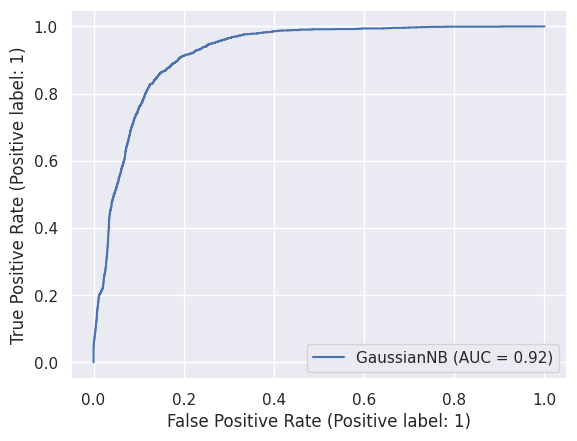

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
Y_pred = gnb.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Has Diabetes','Does Not Has Diabetes'])
cmd.plot(cmap=plt.cm.Greens)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(gnb, X_test, y_test)

Accuracy score:  0.9552522373881306
F1 score:  0.688695652173913
Precision score:  0.8256880733944955
Recall score:  0.5906921241050119


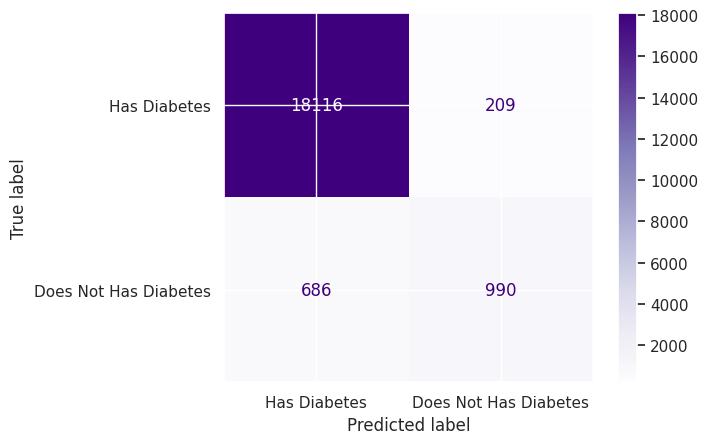

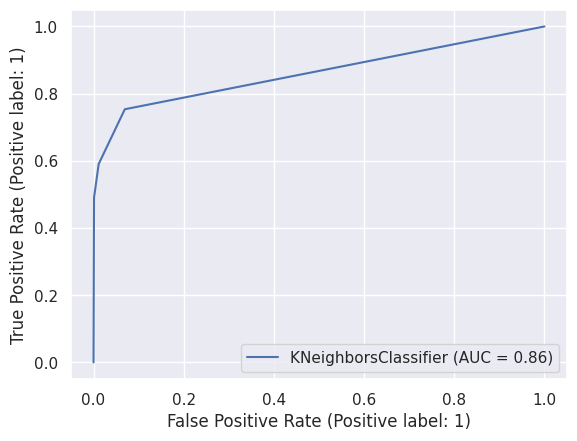

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
Y_pred = neigh.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Has Diabetes','Does Not Has Diabetes'])
cmd.plot(cmap=plt.cm.Purples)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(neigh, X_test, y_test)

Accuracy score:  0.9568021598920055
F1 score:  0.6832844574780059
Precision score:  0.8859315589353612
Recall score:  0.5560859188544153


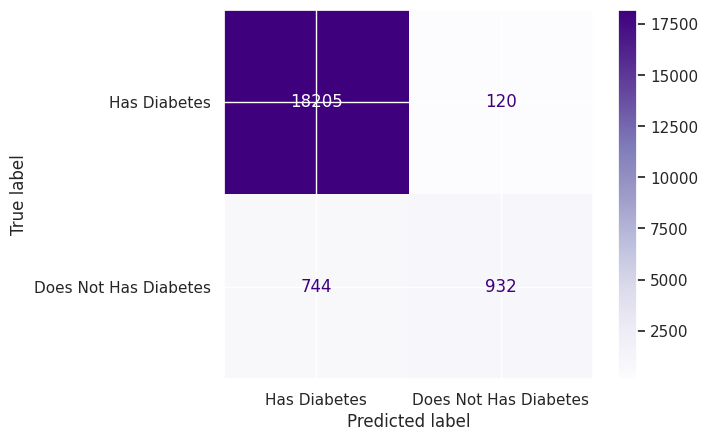

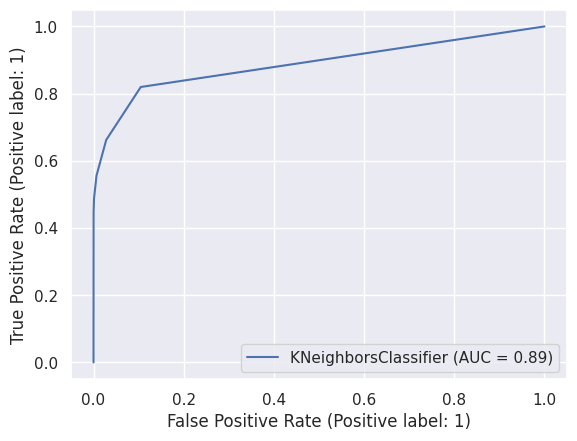

In [ ]:
#using hyper parameter
neigh = KNeighborsClassifier(algorithm='kd_tree' )
neigh.fit(X_train, y_train)
Y_pred = neigh.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Has Diabetes','Does Not Has Diabetes'])
cmd.plot(cmap=plt.cm.Purples)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(neigh, X_test, y_test)

Accuracy score:  0.9711014449277536
F1 score:  0.8001383125864454
Precision score:  0.9514802631578947
Recall score:  0.6903341288782816


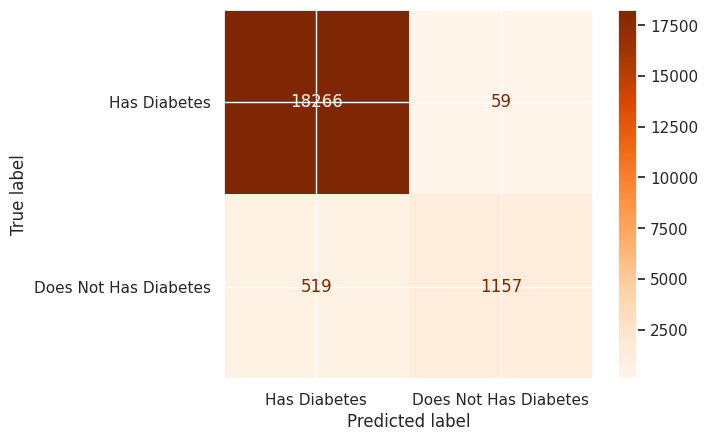

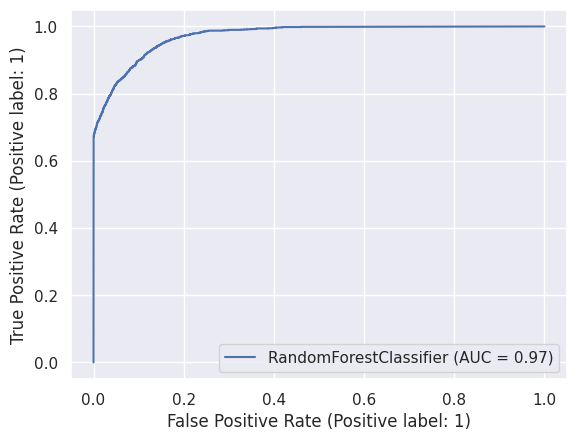

In [ ]:
rf = RandomForestClassifier(max_depth=20, random_state=0)
rf.fit(X_train, y_train)
Y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Has Diabetes','Does Not Has Diabetes'])
cmd.plot(cmap=plt.cm.Oranges)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(rf, X_test, y_test)

Accuracy score:  0.9710514474276286
F1 score:  0.7990281152377647
Precision score:  0.9551867219917013
Recall score:  0.6867541766109785


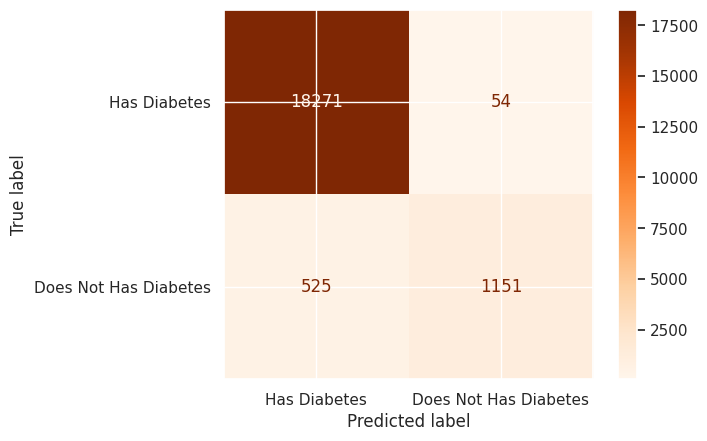

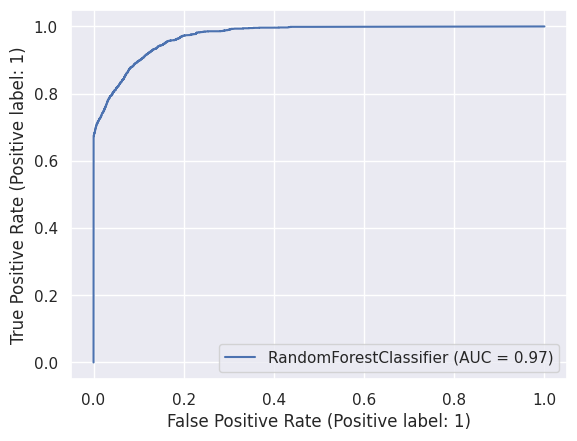

In [ ]:
#using hyper parameter
rf = RandomForestClassifier(max_depth=20,max_features='log2')
rf.fit(X_train, y_train)
Y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Has Diabetes','Does Not Has Diabetes'])
cmd.plot(cmap=plt.cm.Oranges)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(rf, X_test, y_test)

Accuracy score:  0.9540022998850057
F1 score:  0.7287735849056604
Precision score:  0.7202797202797203
Recall score:  0.7374701670644391


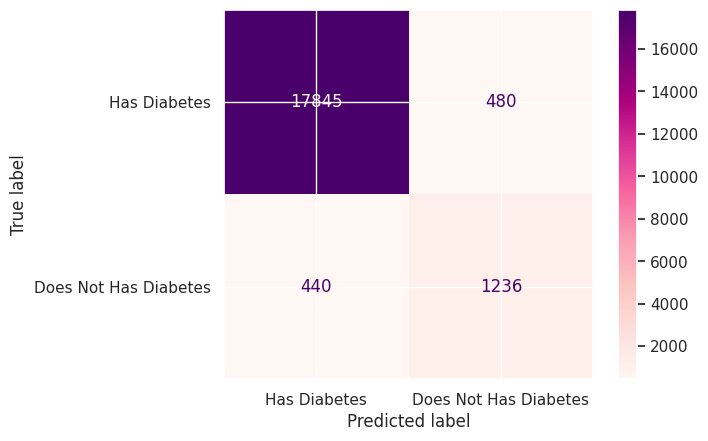

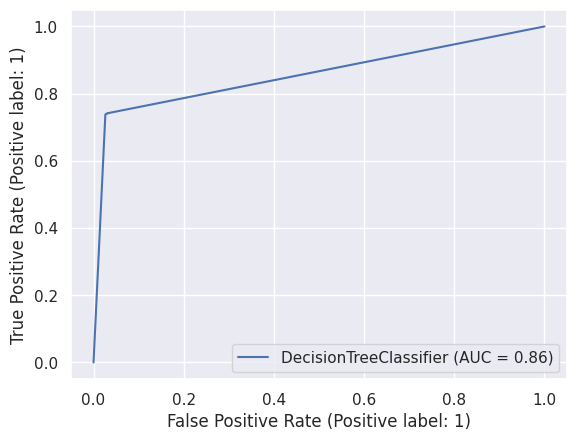

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
Y_pred = dt.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Has Diabetes','Does Not Has Diabetes'])
cmd.plot(cmap=plt.cm.RdPu)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(dt, X_test, y_test)

Accuracy score:  0.9723513824308785
F1 score:  0.8024294390853877
Precision score:  1.0
Recall score:  0.6700477326968973


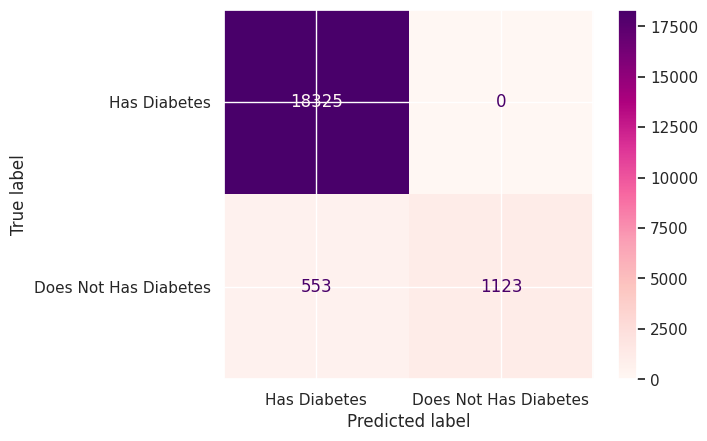

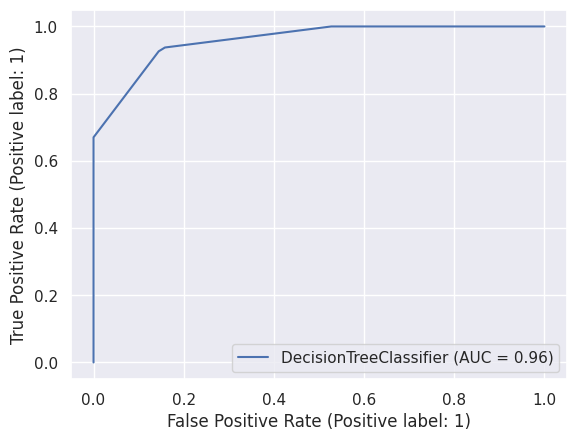

In [ ]:
#using hyper parameter
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)
Y_pred = dt.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Has Diabetes','Does Not Has Diabetes'])
cmd.plot(cmap=plt.cm.RdPu)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(dt, X_test, y_test)

Accuracy score:  0.9019549022548873
F1 score:  0.5266714940864108
Precision score:  0.44223753546817995
Recall score:  0.6509546539379475


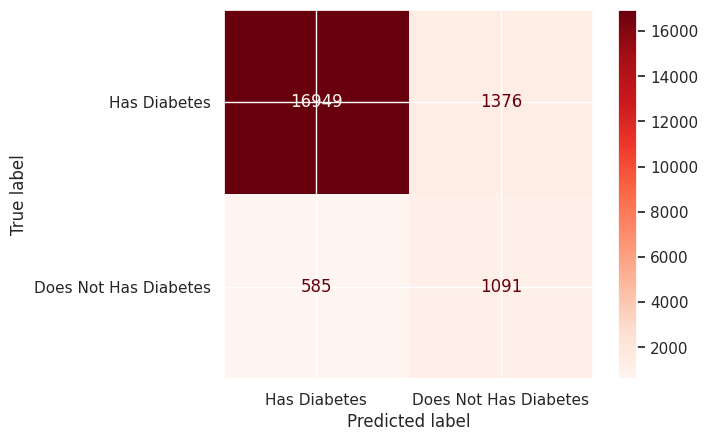

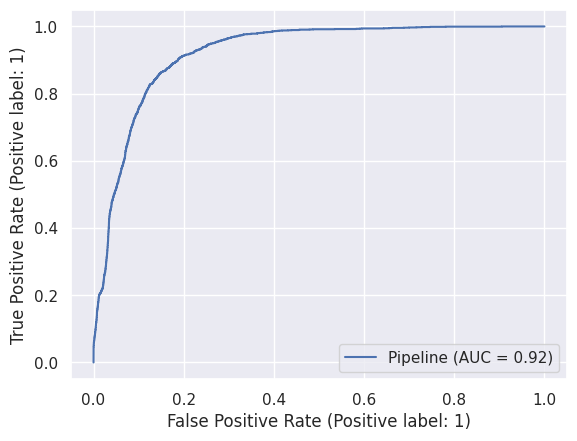

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
Y_pred = clf.predict(X_test)
clf.predict_proba(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Has Diabetes','Does Not Has Diabetes'])
cmd.plot(cmap=plt.cm.Reds)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)

Accuracy score:  0.9019549022548873
F1 score:  0.5266714940864108
Precision score:  0.44223753546817995
Recall score:  0.6509546539379475


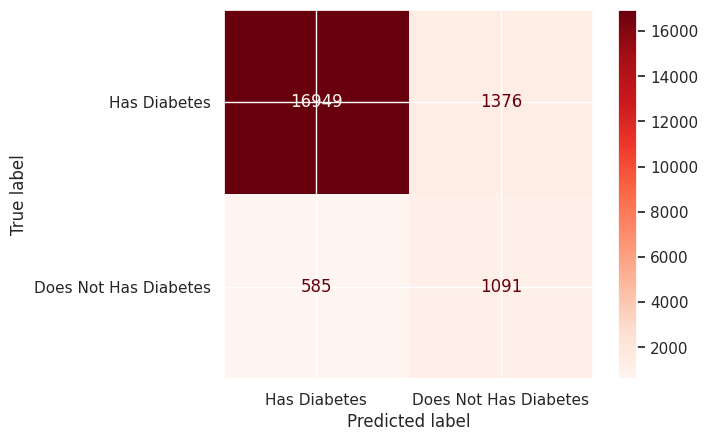

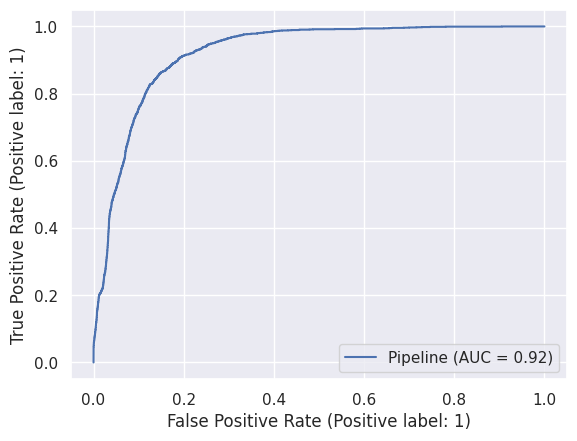

In [ ]:
#using hyper parameter
model = LinearRegression(n_jobs=5)
model.fit(X_train, y_train)
Y_pred = clf.predict(X_test)
clf.predict_proba(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Has Diabetes','Does Not Has Diabetes'])
cmd.plot(cmap=plt.cm.Reds)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)

Accuracy score:  0.9019549022548873
F1 score:  0.5266714940864108
Precision score:  0.44223753546817995
Recall score:  0.6509546539379475


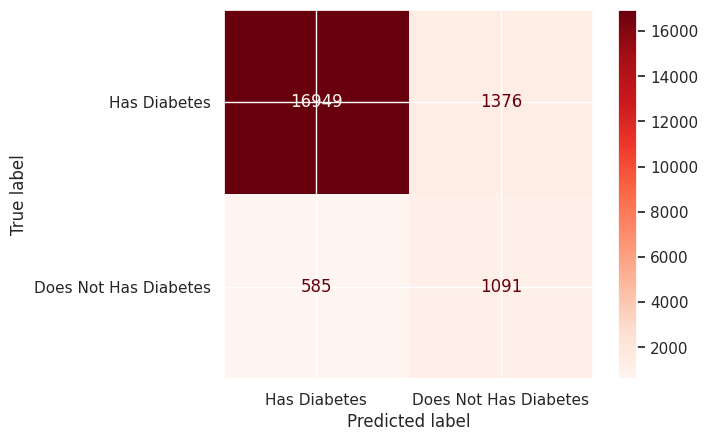

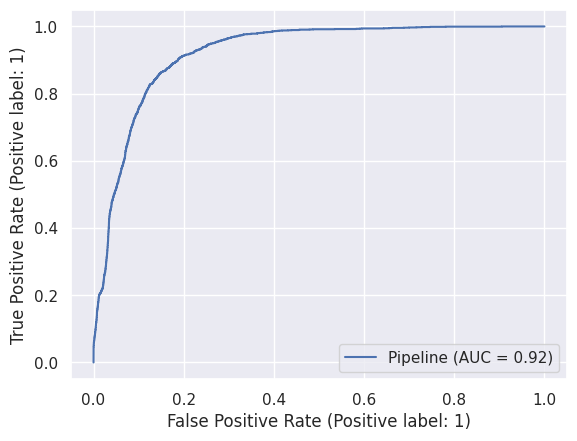

In [ ]:
model = svm.SVC()
model.fit(X_train, y_train)
Y_pred = clf.predict(X_test)
clf.predict_proba(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Has Diabetes','Does Not Has Diabetes'])
cmd.plot(cmap=plt.cm.Reds)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)